In [1]:
import numpy
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
#extract csv from bag files
def data_csv(b):

    csvfiles = []
    for t in b.topics:
        data = b.message_by_topic(t)
        csvfiles.append(data)

    print(csvfiles[0])
    data = pd.read_csv(csvfiles[0])
    return data

In [3]:
b = bagreader("/home/krishna/EECE5554/LAB1/src/Data/stationary_beside_building.bag")
csv_data = data_csv(b)

[INFO]  Data folder /home/krishna/EECE5554/LAB1/src/Data/stationary_beside_building already exists. Not creating.
/home/krishna/EECE5554/LAB1/src/Data/stationary_beside_building/gps.csv


In [4]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/gps,gps_driver/gps_msg,239,1.000036


In [5]:
df_gps = pd.read_csv("/home/krishna/EECE5554/LAB1/src/Data/stationary_beside_building/gps.csv")

In [6]:
df_gps

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,UTM_easting,UTM_northing,Zone,Letter
0,1.675892e+09,0,77272,0,GPS1_Frame,42.337862,71.089968,21.8,672171.204840,4.689405e+06,42.0,T
1,1.675892e+09,0,77273,0,GPS1_Frame,42.337862,71.089968,21.8,672171.204840,4.689405e+06,42.0,T
2,1.675892e+09,0,77274,0,GPS1_Frame,42.337862,71.089968,21.8,672171.204840,4.689405e+06,42.0,T
3,1.675892e+09,0,77275,0,GPS1_Frame,42.337862,71.089968,21.8,672171.204840,4.689405e+06,42.0,T
4,1.675892e+09,0,77276,0,GPS1_Frame,42.337867,71.089968,22.1,672171.191194,4.689406e+06,42.0,T
...,...,...,...,...,...,...,...,...,...,...,...,...
234,1.675892e+09,0,77505,0,GPS1_Frame,42.337868,71.089960,19.2,672170.500118,4.689406e+06,42.0,T
235,1.675892e+09,0,77506,0,GPS1_Frame,42.337868,71.089960,19.2,672170.500118,4.689406e+06,42.0,T
236,1.675892e+09,0,77508,0,GPS1_Frame,42.337868,71.089960,19.2,672170.500118,4.689406e+06,42.0,T
237,1.675892e+09,0,77509,0,GPS1_Frame,42.337868,71.089958,19.2,672170.362813,4.689406e+06,42.0,T


In [7]:
#mean data - standardizing the data by subtracting the mean

df_gps['UTM_easting_mean'] = df_gps['UTM_easting'] - df_gps['UTM_easting'].mean(axis=0)
df_gps['UTM_northing_mean'] = df_gps['UTM_northing'] - df_gps['UTM_northing'].mean(axis=0)

In [8]:
df_gps['UTM_easting'].median(axis=0), df_gps['UTM_northing'].median(axis=0)

(672170.8020213473, 4689405.455435184)

In [9]:
df_gps['UTM_easting_mean'], df_gps['UTM_northing_mean'] 

(0      0.207783
 1      0.207783
 2      0.207783
 3      0.207783
 4      0.194137
          ...   
 234   -0.496939
 235   -0.496939
 236   -0.496939
 237   -0.634245
 238   -0.634245
 Name: UTM_easting_mean, Length: 239, dtype: float64,
 0     -0.338139
 1     -0.338139
 2     -0.338139
 3     -0.338139
 4      0.217073
          ...   
 234    0.385270
 235    0.385270
 236    0.385270
 237    0.381895
 238    0.381895
 Name: UTM_northing_mean, Length: 239, dtype: float64)

In [10]:
#CEP - circular probable error
cep_radius = 0.56*(df_gps['UTM_easting_mean'].std() + 0.62*df_gps['UTM_northing_mean'].std())
cep_radius

0.47304736771321054

In [11]:
#2DRMS
drms_2 = 2* np.sqrt(df_gps['UTM_easting_mean'].var() + df_gps['UTM_northing_mean'].var())
drms_2

1.5243796098547087

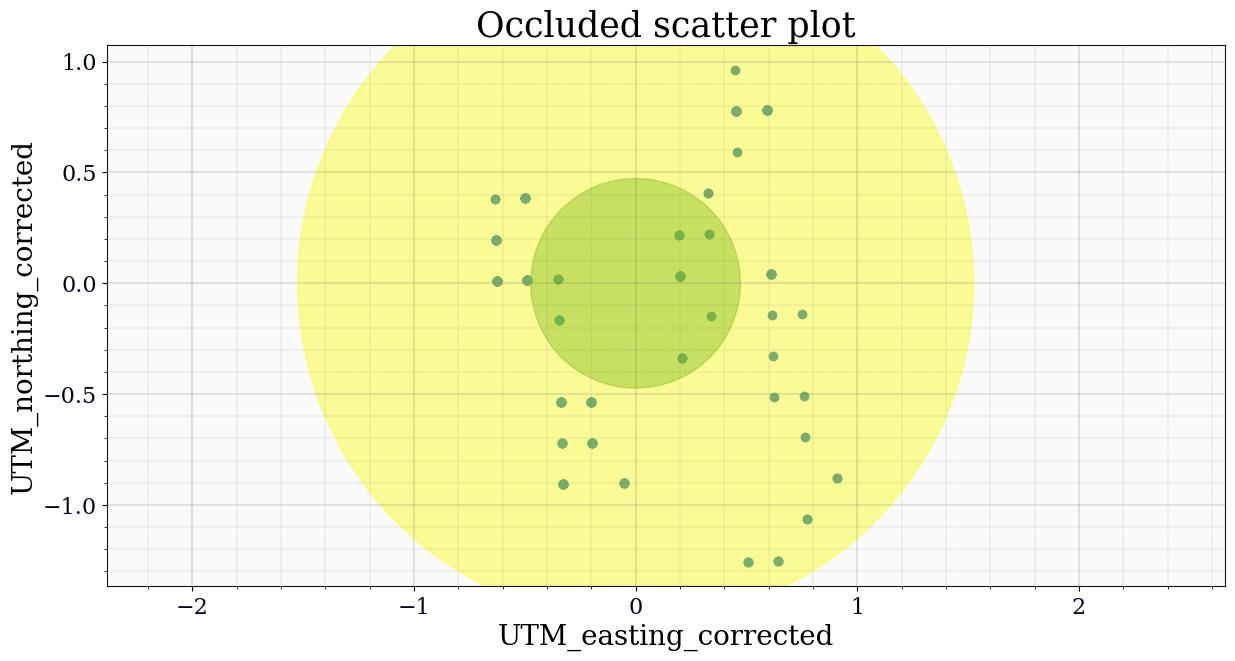

In [12]:
#corrected - the median of the each data in easting and northing was subtracted 
#from the  easting and northing datapoints respectively. 
fig, ax = bagpy.create_fig(1)
ax[0].grid(True)
ax[0].axis('equal')
ax[0].scatter(x='UTM_easting_mean', y='UTM_northing_mean', data=df_gps)
plt.title("Occluded scatter plot")
plt.xlabel("UTM_easting_corrected")
plt.ylabel("UTM_northing_corrected")
cir_CEP = plt.Circle((0,0),cep_radius,color='forestgreen',alpha=0.4)
cir_drms = plt.Circle((0,0),drms_2,color='yellow',alpha=0.4)
ax[0].add_artist(cir_CEP)
ax[0].add_artist(cir_drms)
plt.savefig('/home/krishna/northing.png')
plt.show()

In [13]:
from scipy.stats import norm
import math
from statistics import mean,median 

Mean: 9867.475912480799
Median: 9867.475667929491


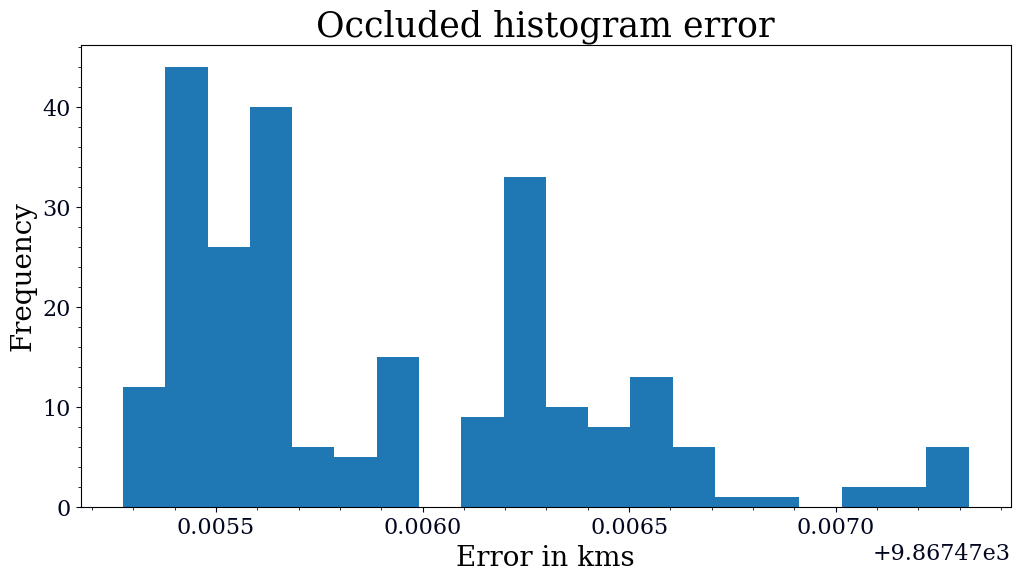

In [14]:
def distance(lat1, lon1, lat2, lon2):
    # convert decimal degrees to radians 
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # haversine formula 
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers.
    return c * r


# Load the data from a LibreOffice spreadsheet into a pandas DataFrame
df = pd.read_csv("/home/krishna/EECE5554/LAB1/src/Data/stationary_beside_building/gps.csv")

# Subtract the first value from each column to scale the data with your stationary data sets
easting = df['UTM_easting'] = df['UTM_easting'] - df['UTM_easting'][0]
northing = df['UTM_northing'] = df['UTM_northing'] - df['UTM_northing'][0]
altitude = df['Altitude']
time = df['Time']
latitude = df['Latitude']
longitude = df['Longitude']


# Error calculations
k_lat = 42.3378616666667
k_lon = -71.0899683333333
error = []
for i in range(0,239):
    error.append(distance(latitude[i], longitude[i], k_lat, k_lon))

a = mean(error)
print("Mean:", a)

b = median(error)
print("Median:",b)

# Error histogram plot
plt.hist(error, bins=20)
plt.xlabel('Error in kms')
plt.ylabel('Frequency')
plt.title('Occluded histogram error')
plt.show()




In [15]:
#percentage of points near the median
#considering that the median here (0,0)
df_gps['dist_euclidean'] = np.sqrt( (df_gps['UTM_easting_mean'])**2 + (df_gps['UTM_northing_mean'])**2)

df_gps['dist_euclidean'] 

0      0.396878
1      0.396878
2      0.396878
3      0.396878
4      0.291221
         ...   
234    0.628794
235    0.628794
236    0.628794
237    0.740345
238    0.740345
Name: dist_euclidean, Length: 239, dtype: float64

In [16]:
df_gps['dist_euclidean'].mean(), df_gps['dist_euclidean'].min(), df_gps['dist_euclidean'].max()

(0.7170782061285573, 0.20124606467801995, 1.408426347211225)

In [17]:
#  Distance Root Mean Squared (DRMS) - 
#DRMS is the square root of the average of the square errors 
df_gps['square_error'] = (df_gps['UTM_easting_mean'])**2 + (df_gps['UTM_northing_mean'])**2
drms = np.sqrt(df_gps['square_error'].mean())

In [18]:
#median data

df_gps['easting_median'] = df_gps['UTM_easting'] - df_gps['UTM_easting'].median(axis=0)
df_gps['northing_median'] = df_gps['UTM_northing'] - df_gps['UTM_northing'].median(axis=0)

In [19]:
df_gps['easting_median']


0      0.402819
1      0.402819
2      0.402819
3      0.402819
4      0.389173
         ...   
234   -0.301903
235   -0.301903
236   -0.301903
237   -0.439208
238   -0.439208
Name: easting_median, Length: 239, dtype: float64

In [20]:
df_gps['UTM_easting'].median(axis=0), df_gps['UTM_northing'].median(axis=0)

(672170.8020213473, 4689405.455435184)

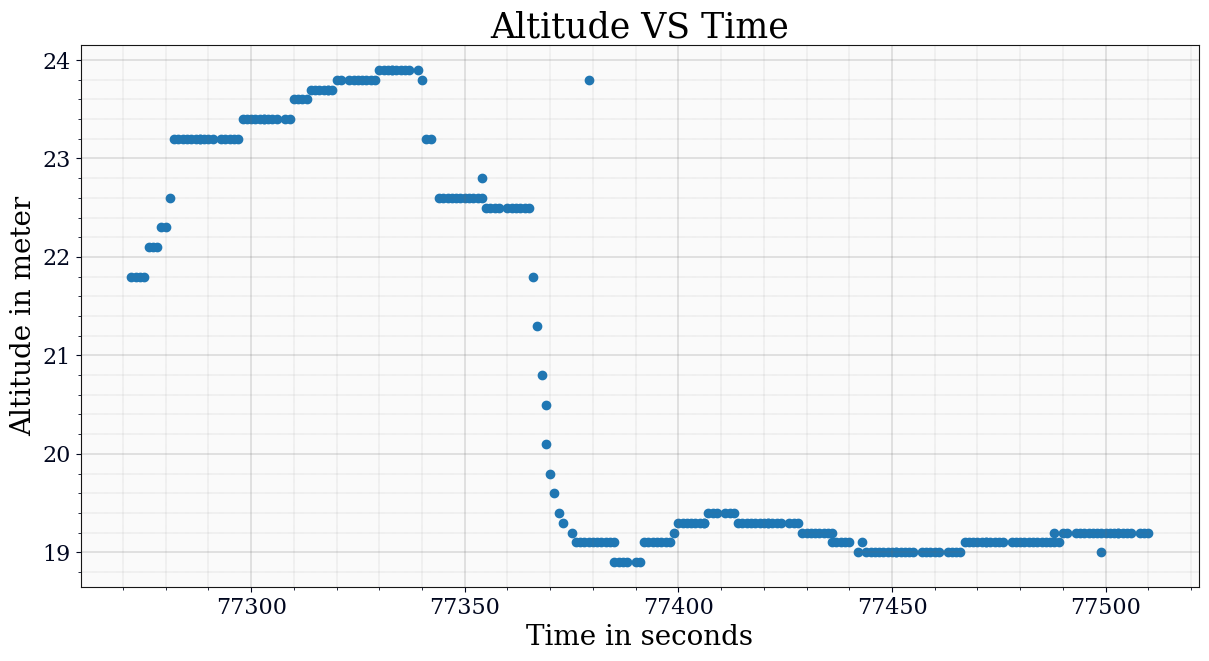

In [21]:
fig, ax = bagpy.create_fig(1)
ax[0].scatter(x='Header.stamp.secs', y='Altitude', data=df_gps)
plt.xlabel("Time in seconds")

plt.ylabel("Altitude in meter")
plt.title("Altitude VS Time")
plt.show()

In [22]:
#mean, variance

[ df_gps['Altitude'].mean(), df_gps['Altitude'].var() ]

[20.76443514644351, 3.9449062972469315]